# Data exploration

# Purpose
Explore the ForSea data

# Methodology
Quickly describe assumptions and processing steps.

# Setup

In [3]:
# %load imports.py
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import os
from collections import OrderedDict

from IPython.display import display

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)

import folium

import sys
import os
sys.path.append('../')

import src.data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '3e9a363e-f191-4398-bd11-d32ccef9529c'
resource_group = 'demops'
workspace_name = 'D2E2F'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='tycho_short')
df_raw = dataset.take(100000).to_pandas_dataframe()

In [5]:
#file_path = os.path.join(src.data.path_tycho)
#
#max_rows = 200000
#min_V = 0.01
#
#reader = pd.read_csv(file_path, chunksize=10000, iterator=True)  # Loading a small part of the data
#df_raw = pd.DataFrame()
#for df_ in reader:
#    
#    mask = df_['Speed over ground (kts)']>min_V
#    df_=df_.loc[mask].copy()
#    df_raw = df_raw.append(df_)
#    
#    if len(df_raw) > max_rows:
#        break
    
df_raw.set_index('Timestamp [UTC]', inplace=True)
df_raw.index = pd.to_datetime(df_raw.index)

In [6]:
df_raw.describe()

,Latitude (deg),Longitude (deg),Speed over ground (kts),Heading (deg),Power EM Thruster 1 (kW),Power EM Thruster 2 (kW),Power EM Thruster 3 (kW),Power EM Thruster 4 (kW),Power EM Thruster Total (kW),Course over ground (deg),Sin PM1 (),Sin PM2 (),Sin PM3 (),Sin PM4 (),Cos PM1 (),Cos PM2 (),Cos PM3 (),Cos PM4 (),Power heeling (kW),Power Propulsion Total (kW)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.036244,12.655946,8.512937,87.240909,429.036510,456.606300,416.778750,401.479710,1703.90127,166.164534,-0.030633,0.023000,-0.028134,-0.010248,0.050580,0.053551,0.012817,0.015294,1.727850,1703.90127
std,0.003658,0.025109,3.266557,51.798938,193.888488,208.655314,198.967253,185.898365,759.89855,92.085678,0.305624,0.316776,0.328664,0.328501,0.942568,0.946289,0.943810,0.944261,15.035284,759.89855
min,56.030430,12.616640,0.390000,0.000000,-78.000000,-72.000000,-74.000000,-76.000000,-280.00000,16.310000,-0.997860,-1.000000,-0.999970,-1.000000,-0.998320,-1.000000,-1.000000,-1.000000,-13.000000,-280.00000
25%,56.032910,12.632370,6.810000,68.000000,316.000000,330.000000,291.000000,291.000000,1297.00000,78.010000,-0.069340,-0.012940,-0.047270,-0.017820,-0.996340,-0.999660,-0.999880,-0.998290,0.000000,1297.00000
50%,56.035420,12.656975,9.990000,77.700000,489.000000,525.000000,461.000000,446.000000,1940.00000,194.835000,-0.047060,0.052120,-0.022030,0.042300,0.486755,0.445160,0.001650,0.023220,0.000000,1940.00000
75%,56.038510,12.680902,10.790000,87.600000,579.000000,622.000000,582.000000,555.000000,2292.00000,261.060000,0.009280,0.059690,0.045380,0.051390,0.985840,0.996640,0.997040,0.998500,0.000000,2292.00000
max,56.043610,12.691140,13.210000,359.899990,874.000000,924.000000,843.000000,800.000000,3180.00000,320.269990,0.990080,0.999970,1.000000,0.999970,0.988890,0.999360,0.999970,0.999970,245.000000,3180.00000


In [7]:
df_raw.head()

,Latitude (deg),Longitude (deg),Speed over ground (kts),Heading (deg),Power EM Thruster 1 (kW),Power EM Thruster 2 (kW),Power EM Thruster 3 (kW),Power EM Thruster 4 (kW),Power EM Thruster Total (kW),Course over ground (deg),Sin PM1 (),Sin PM2 (),Sin PM3 (),Sin PM4 (),Cos PM1 (),Cos PM2 (),Cos PM3 (),Cos PM4 (),Power heeling (kW),Power Pitch Thruster 1 (kW),Power Pitch Thruster 2 (kW),Power Pitch Thruster 3 (kW),Power Pitch Thruster 4 (kW),Power Steer Thruster 1 (kW),Power Steer Thruster 2 (kW),Power Steer Thruster 3 (kW),Power Steer Thruster 4 (kW),Power Propulsion Total (kW),Power hotel Total (kW)
Timestamp [UTC],,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01 08:31:19,56.0331,12.61723,0.42,77.7,146.0,123.0,148.0,164.0,581.0,89.04,-0.20230,-0.15491,0.01044,-0.01880,-0.98050,-0.99164,-1.0,-0.99954,0.0,None,None,None,None,None,None,None,None,581.0,None
2020-01-01 08:31:20,56.0331,12.61723,0.40,77.6,164.0,166.0,150.0,162.0,642.0,86.49,-0.10016,-0.09088,0.02536,-0.00851,-0.98849,-0.99707,-1.0,-0.99966,0.0,None,None,None,None,None,None,None,None,642.0,None
2020-01-01 08:31:21,56.0331,12.61723,0.48,77.5,171.0,177.0,146.0,162.0,656.0,84.19,-0.07849,-0.02191,0.02719,-0.00839,-0.99469,-0.99997,-1.0,-0.99969,0.0,None,None,None,None,None,None,None,None,656.0,None
2020-01-01 08:31:22,56.0331,12.61724,0.56,77.4,182.0,186.0,152.0,159.0,679.0,81.75,-0.05557,0.00128,0.02710,-0.00848,-0.99591,-0.99997,-1.0,-0.99969,0.0,None,None,None,None,None,None,None,None,679.0,None
2020-01-01 08:31:23,56.0331,12.61724,0.56,77.3,203.0,205.0,150.0,158.0,716.0,80.01,-0.04800,0.00131,0.02771,-0.00830,-0.99615,-0.99994,-1.0,-0.99954,0.0,None,None,None,None,None,None,None,None,716.0,None


In [8]:
df = df_raw.rename(columns = {
    'Latitude (deg)' : 'latitude',
    'Longitude (deg)' : 'longitude',
        
    
})

df['V'] = df['Speed over ground (kts)']*1.852/3.6


df.drop(columns=[
    'Speed over ground (kts)',
], inplace=True)



## Plot maps

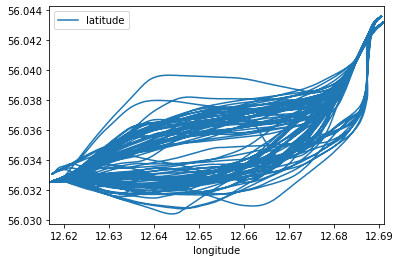

In [9]:
df.plot(x='longitude', y='latitude')

In [10]:
df_ = df.resample('30S').mean()
df_.dropna(subset=['latitude','longitude'], inplace=True)

mask = df_['Course over ground (deg)'] < 150
df_out = df_.loc[mask]
df_home = df_.loc[~mask]



In [11]:

my_map = folium.Map(location=(df_['latitude'].mean(),df_['longitude'].mean()), zoom_start=14)

points = df_[['latitude','longitude']].to_records(index=False)
colors = list(df_['Course over ground (deg)'].values)
colormap = ['red','green']
line = folium.ColorLine(points, colors, colormap=colormap, opacity = 0.30, popup='out', weight=1.0)
line.add_to(my_map);

In [12]:
my_map